# 10 nM FITC-labeled ds60mer (3/28) and bovine Arp2/3 complex

In [1]:
arp23_max_concentration = 59.4 / 60.0 * 0.657 / 140000 * 1e6
print(arp23_max_concentration)

4.645928571428572


In [2]:
from numpy import array, logspace

In [3]:
anisotropy_row = array([0.060,
                       0.061,
                       0.060,
                       0.061,
                       0.061,
                       0.062,
                       0.064,
                       0.064,
                       0.066,
                       0.071,
                       0.072,
                       0.083,
                       0.097])
no_points = len(anisotropy_row)
arp23_concentration_row = arp23_max_concentration * logspace(-(no_points - 1), 0, num = no_points, base = 2)

In [4]:
%matplotlib inline
from matplotlib.pyplot import subplots

In [5]:
from scipy.optimize import curve_fit
from numpy import sqrt

In [6]:
def dna_anisotropy(arp23_concentration, dissociation_constant, min_anisotropy, max_anisotropy):
    anisotropy = min_anisotropy + 0.5 * (max_anisotropy - min_anisotropy) * (dissociation_constant + arp23_concentration + 0.010 - 
                                       sqrt((dissociation_constant + arp23_concentration + 0.010)**2 - 
                                            4 * arp23_concentration * 0.010)) / 0.010
    return anisotropy

In [7]:
p2opt, p2cov = curve_fit(dna_anisotropy, arp23_concentration_row, anisotropy_row, p0 = [0.5, 0.07, 0.2])

Text(0.5, 0, 'Arp2/3 complex ($\\mu$M)')

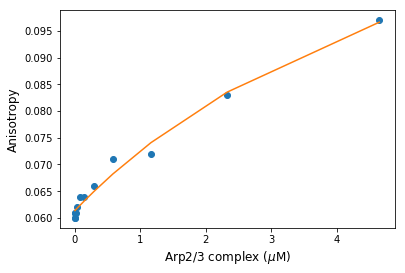

In [8]:
figure_handle, axes_handle = subplots()
axes_handle.plot(arp23_concentration_row, anisotropy_row, 'o')
axes_handle.plot(arp23_concentration_row, dna_anisotropy(arp23_concentration_row, *p2opt))
axes_handle.set_ylabel(r'Anisotropy', fontsize = 12)
axes_handle.set_xlabel(r'Arp2/3 complex ($\mu$M)', fontsize = 12)

In [9]:
from numpy import diag
print(p2opt)
print(sqrt(diag(p2cov)))

[6.68650266 0.0613625  0.14744344]
[2.42881141e+00 5.31383650e-04 2.03071717e-02]
